# Numerical Integration


## Same example:

Calculate the integral of:

$f(x) = \int_0^{\pi}\sin(x)\,dx$ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Integration limits
x_0 = 0.
x_1 = np.pi

# Number of evaluation points
n = 100

# x and y vectors
x = np.linspace(x_0, x_1, n)
y = np.sin(x)

## 5. Using scipy:

In [3]:
import scipy as sc # This is to prevent confusion sympy
from scipy import integrate

### 5.1. With the integrate.trapz() or integrate.simpson() function:

https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapz.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html

In [4]:
# Trazpezoidal method

sc_trapezoid = integrate.trapz(y, x)

print(sc_trapezoid)

1.9998321638939927


/tmp/ipykernel_785/890484516.py:3: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  sc_trapezoid = integrate.trapz(y, x)


In [5]:
# Simpson method

sc_simpson = integrate.simpson(y, x)

print(sc_simpson)

2.0000000534993037


/tmp/ipykernel_785/1645037577.py:3: DeprecationWarning: You are passing x=[0.         0.03173326 0.06346652 0.09519978 0.12693304 0.1586663
 0.19039955 0.22213281 0.25386607 0.28559933 0.31733259 0.34906585
 0.38079911 0.41253237 0.44426563 0.47599889 0.50773215 0.53946541
 0.57119866 0.60293192 0.63466518 0.66639844 0.6981317  0.72986496
 0.76159822 0.79333148 0.82506474 0.856798   0.88853126 0.92026451
 0.95199777 0.98373103 1.01546429 1.04719755 1.07893081 1.11066407
 1.14239733 1.17413059 1.20586385 1.23759711 1.26933037 1.30106362
 1.33279688 1.36453014 1.3962634  1.42799666 1.45972992 1.49146318
 1.52319644 1.5549297  1.58666296 1.61839622 1.65012947 1.68186273
 1.71359599 1.74532925 1.77706251 1.80879577 1.84052903 1.87226229
 1.90399555 1.93572881 1.96746207 1.99919533 2.03092858 2.06266184
 2.0943951  2.12612836 2.15786162 2.18959488 2.22132814 2.2530614
 2.28479466 2.31652792 2.34826118 2.37999443 2.41172769 2.44346095
 2.47519421 2.50692747 2.53866073 2.57039399 2.60212725 2

### 5.2. With the integrate.quad() function:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

$f(x) = \int_0^{\pi}\sin(x)\,dx$ 

In [6]:
# Define func

def function1(x):
    """
    Function to integrate.
    """
    return np.sin(x)

In [7]:
# Return integral value + error

sc_quad, est_err_quad = integrate.quad(function1, 0., np.pi)

print(sc_quad, est_err_quad)

2.0 2.220446049250313e-14


### 5.3. Double integrals:

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html

#### Example:

Integrate:

$f(x, y) = x\,y^2$ between $x=(0,2)$ and $y=(0,1)$


$\int_0^2 \int_0^1 f(x, y)\,dy\,dx$


$\Rightarrow \int_0^2 \int_0^1 x\,y^2\,dy\,dx$


In [8]:
# Define our domain

x = np.arange(-2., 2., 0.01)
y = np.arange(-2., 2., 0.01)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

# Compute surface
Z = x_2d*y_2d**2

print(Z.shape)

(400, 400)


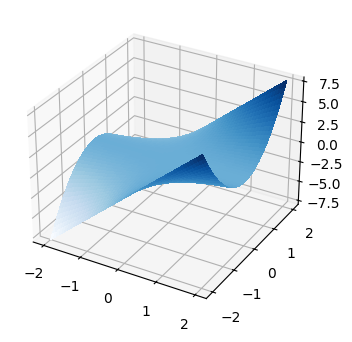

In [9]:
fig, ax = plt.subplots(figsize = (5, 4), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, Z, cmap='Blues', linewidth=0, antialiased=False)

# Customise the z axis.
ax.set_zlim(-8, 8)

plt.show()



### Integral:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html?highlight=dblquad

In [10]:
# Use lambda function

func = lambda y, x: x*y**2

In [11]:
# Call QUAD integrator

result = integrate.dblquad(func, 0., 2., 0., 1.)

print(result)

print("Integral value:", result[0])
print("Error value:", result[1])

(0.6666666666666667, 7.401486830834377e-15)
Integral value: 0.6666666666666667
Error value: 7.401486830834377e-15


### Use sympy (symbolic algrebra)

In [12]:
import sympy as sp

In [13]:
# Define symbols
x, y = sp.symbols('x, y')

# Evaluate integral
y_eval = sp.integrate(x*y**2, (y, 0, 1), (x, 0, 2))

print("Integral value is: ", float(y_eval))

Integral value is:  0.6666666666666666


### Example:

Integrate: 

$\int\int f(x,y)\,dy\,dx$, where $f(x,y) = 4\,x\,y- y^3$

in the region bounded by $y = \sqrt{x}$ and $y = x^3$.

In [14]:
# Define our domain
x = np.arange(0, 1.2, 0.01)

# Two functions for the boundaries.
y1 = np.sqrt(x)

y2 = x**3

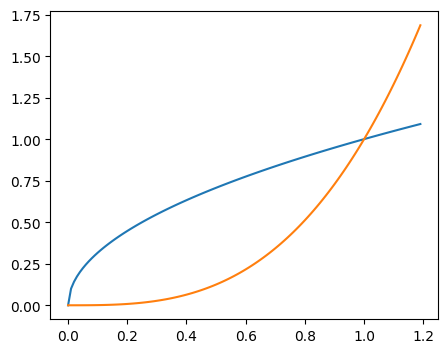

In [15]:
# Plotting
fig, ax = plt.subplots(figsize = (5, 4))

# Plot
ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

In [16]:
# Coordinates for the grid
x = np.arange(0, 1.2, 0.01)
y = np.arange(0, 1.2, 0.01)

# Meshgrid
x_2d, y_2d = np.meshgrid(x, y)

# New surface
Z1 = 4*x_2d*y_2d - y_2d**3

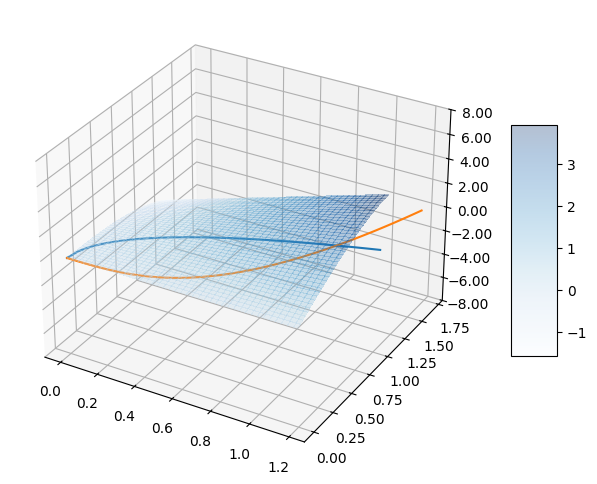

In [17]:
fig, ax = plt.subplots(figsize = (10, 6), subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(x_2d, y_2d, Z1, cmap='Blues', linewidth=0, antialiased=False, alpha = 0.3)

# Added boundaries
ax.plot(x, y1)
ax.plot(x, y2)

# Customize the z axis.
ax.set_zlim(-8, 8)

ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Integrals:

#### Using sympy:

In [18]:
# Define symbols
x, y = sp.symbols('x, y')

# Evaluate the integral
y_eval = sp.integrate((4*x*y - y**3), (y, x**3, x**0.5), (x, 0., 1.))

print("Integral value:", y_eval)

Integral value: 0.352564102564102


#### Using dblquad():

In [19]:
# Function to integrate

f1 = lambda y, x: 4*x*y - y**3

In [20]:
# Evaluate the integral

result1 = integrate.dblquad(f1, 0, 1, lambda x: x**3, lambda x: x**0.5)

print("Integral value:", result1[0])
print("Error value:", result1[1])

Integral value: 0.35256410256410253
Error value: 8.05729071063299e-15


### 5.4. Triple integrals:

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html

#### Example:

Integrate:

$f(x, y, z) = x\,y\,z$ between $x=(1,2)$, $y=(2,3)$, $z=(0,1)$


$\int_1^2 \int_2^3 \int_0^1 f(x, y, z)\,dz\,dy\,dx$


$\Rightarrow \int_1^2 \int_2^3 \int_0^1 x\,y\,z\,dz\,dy\,dx$


#### Using sympy:

In [21]:
# Define symbols
x, y, z = sp.symbols('x, y, z')

# Evaluate the 3D integral
y_eval2 = sp.integrate((x*y*z), (z, 0, 1), (y, 2, 3), (x, 1, 2))

print(float(y_eval2))

1.875


#### Using scipy:

In [22]:
# Define the function to integrate

func3d = lambda z, y, x: x*y*z # f takes arguments in the order (z, y, x).

# Evaluate the integral

result2 = integrate.tplquad(func3d, 1, 2, 2, 3, 0, 1)

print("Integral value:", result2[0])
print("Error value:", result2[1])

Integral value: 1.8750000000000002
Error value: 3.324644794257407e-14


### Example:

Integrate:

$f(x, y, z) = x\,y\,z$ between $x=(0,1)$, $y=(0,1-2x)$, $z=(0,1-x-2y)$


$\int_0^1 \int_0^{1-2x} \int_0^{1-x-2y} f(x, y, z)\,dz\,dy\,dx$


$\Rightarrow \int_0^1 \int_0^{1-2x} \int_0^{1-x-2y} xyz\,dz\,dy\,dx$

#### Using sympy:

In [23]:
# Define symbols
x, y, z = sp.symbols('x, y, z')

# Evaluate the integral
y_eval3 = sp.integrate((x*y*z), (z, 0, 1 - x - 2*y), (y, 0, 1 - 2*x), (x, 0, 1))

print("Integral value: ", float(y_eval3))

Integral value:  0.05416666666666667


#### Using scipy:

In [24]:
#func3d_1 = lambda z, y, x: x*y*z

result3 = integrate.tplquad(func3d, 0, 1, 0, lambda x: 1 - 2*x, 0, lambda x, y: 1 - x -2*y)

print("Integral value: ", result3[0])
print("Error value: ", result3[1])


Integral value:  0.05416666666666667
Error value:  2.1774196738157757e-14


## 6. Integrals with infinity ($\pm\infty$) using sympy:

### Example:

Calculate the integral of:

$f(x) = \int_0^{\infty}\exp(-x^2)\,dx$ 

In [25]:
# Define symbol
x = sp.Symbol('x')

# Evaluate the integral
y = sp.integrate(sp.exp(-x**2), x)

print(y)

sqrt(pi)*erf(x)/2


In [26]:
# Definite integral

y_eval = sp.integrate(sp.exp(-x**2), (x, 0, np.inf))

In [27]:
print(y_eval)

sqrt(pi)/2


In [28]:
print(float(y_eval))

0.886226925452758


### Example:

Calculate the integral of:

$f(x) = \int_{-\infty}^{\infty}\exp(-x^2)\,dx$ 

In [29]:
# Evaluate the integral directly

y_eval2 = sp.integrate(sp.exp(-x**2), (x, -np.inf, np.inf))

In [32]:
print(y_eval2, type(y_eval2))

sqrt(pi) <class 'sympy.core.power.Pow'>


In [30]:
print(y_eval2)

sqrt(pi)


In [31]:
print(float(y_eval2))

1.772453850905516
